# 텍스트 마이닝
- 자연어 처리 (NLP : Netural Language Processing) : 사람이 쓰는 말들을 컴퓨터가 분석하여 텍스트에 담겨있는 의미를 분석하거나 처리하는 작업
- 음성인식, 내용요약, 번역, 감성분석, 카테고리 분류, 스팸메일 분류, 질의응답(챗봇), 문장생성 등

# 텍스트 전처리
 - Text Mining에서 가장 중요한 작업
 - 사람이 쓰는 언어를 컴퓨터가 이해할 수 있는 데이터로 변환하는 작업
 - 토큰화 -> 인코딩 -> 임베딩
  - 토큰화 : 문장(corpus)을 분리하는 작업
  - 인코딩 : 토큰을 숫자로 변환하는 작업
  - 임베딩 : 숫자를 컴퓨터가 인식할 수 있도록 의미를 부여하는 작업

# 텍스트 전처리 과정
  (1) 토큰화 과정 : 문장을 토큰(단어, 짧은 문장, 자소, 이모티콘 등) 으로 분리하는 작업
  - 토큰 분리 전 작업
    - 오류수정 : 오타, 글씨깨짐 등
    - 결측치 삭제
    - 원하는 데이터만 추출 : 한글, 이모티콘, 숫자, 영어 등 -> 정규식 활용
    - 데이터 증강
      - 단어 생략 : 일부 단어 생략
        - ex) 나는 학교에 갑니다 -> 나는 갑니다
      - 단어 교환 : 서로 단어 위치 교환
        - ex) 갑니다 학교에 나는
      - 단어 추가
        - ex) 나는 아침에 학교에 갑니다
      - 유사단어 변경
        - ex) 나는 초등학교에 갑니다
      - 번역 후 재번역
        - ex) 我去上學 -> 난 학교에 간다
  - 토큰 분리
    - 영어 : 빈 공백으로 분리
    - 한국 : 형태소로 분리
      - 띄어쓰기가 지켜지지 않고, 여러 단어로 구성된 단어가 많음, 같은 잔어 다른 의미, 다른 단어 같은 의미가 많음,,
  - 토큰 분리 후 작업
    - 불용어(stopword) 처리 : 학습에 사용하지 않는 토큰 사용(감탄사,부사, 전치사, 조사)등
    - 정규화 : 토큰 분리, 통합
      - 어간 추출
      - 표제어 추출
      - 의미 통합
      - 내부단어 분리

(2) 인코딩 : 문자 -> 숫자 (빈도수 기반이 많이 사용됨)
  - 토큰의 빈도수를 분석
  - 빈도수 순으로 내림차순 정렬
  - 정렬된 순으로 1부터 인덱스를 부여
  - 토큰을 해당 인덱스로 치환
  - padding : 데이터 길이를 동일하게 맞추는 작업
    - 기준길이보다 긴 경우 : 기준길이만큼 잘라줌
    - 기준길이보다 짧은 경우 : 왼쪽에 부족한 길이만큼 0을 채움
    
(3) 임베딩 : 해당 인덱스에 의미가 부여되도록 단어 사전을 만드는 작업 (토큰들 간의 관계가 수치로 저장)

(4) 딥러닝 모델을 설계하여 학습 진행

# 텍스트 전처리 실습 (영문)
- 라이브러리 설치

In [1]:
# 영문 텍스트 처리 라이브러리
import nltk
# 토큰화
nltk.download('punkt')
# 불용어 처리
nltk.download('stopwords')
# 표제어 처리
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

- 토큰화

In [2]:
import nltk
# 공백을 기준으로 토큰화 수행
from nltk.tokenize import word_tokenize

corpus = "I am a boy. My name is Jhon. My age is 20."
print(word_tokenize(corpus))

['I', 'am', 'a', 'boy', '.', 'My', 'name', 'is', 'Jhon', '.', 'My', 'age', 'is', '20', '.']


- 한글 토큰화

In [3]:
# 한글 처리 라이브러리 설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.2 MB/s eta 0:00:00


In [5]:
import konlpy
# Okt 형태소 분리기
from konlpy.tag import Okt

okt=Okt()
corpus="나는 임혜지다. 메롱"

print(okt.morphs(corpus))

['나', '는', '임혜지', '다', '.', '메롱']


- 인코딩 실습
  - CountVectorizer()
    - 알파벳 / 자음 모음 순으로 오름차순 정렬
    - 정렬순으로 인덱스를 1부터 부여
    - 각 토큰의 빈도수를 분석
    - 토큰을 해당 인덱스로 치환
    - 원핫인코딩 수행 (동일한 길이로 변환) -> 토큰의 수가 많으면 비효율적
  - TfIdVectorizer()
    - TF (Text Frequency) : 토큰의 전체 빈도수
    - DF (Document Frequency) : 해당 문장에만 있는 단어의 수
    - IDF : DF의 역수
    - 워드 임베딩 : 실수 인코딩
    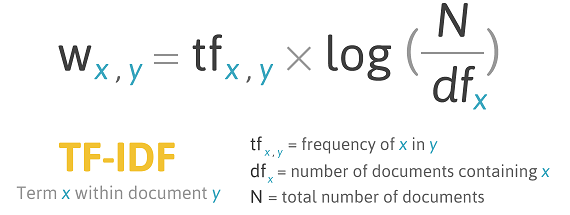
  - Tokenizer()
    - 빈도수 분석
    - 빈도수 순으로 내림차순 정렬
    - 정렬순으로 인덱스를 1부터 부여
    - 토큰을 해당 인덱스로 치환
    - padding 작업이 필요함

- CountVectorizer()을 이용한 인코딩

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus="나는 임혜지 메롱. 너무 졸려요 ㅠㅠ"
cv=CountVectorizer()

cv_fit=cv.fit_transform([corpus])
print("인덱스 분석 결과: ", cv.vocabulary_)
print("빈도수 분석 결과:", cv_fit.toarray())

인덱스 분석 결과:  {'나는': 1, '임혜지': 4, '메롱': 3, '너무': 2, '졸려요': 5, 'ㅠㅠ': 0}
빈도수 분석 결과: [[1 1 1 1 1 1]]


- TfidfVectorizer()을 이용한 인코딩

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus="나는 임혜지 메롱. 너무 졸려요 ㅠㅠ 김찬혁 바보 메롱"
tfidf=TfidfVectorizer()

tfidf_fit=tfidf.fit_transform([corpus])
print("인덱스 분석 결과: ", tfidf.vocabulary_)
print("빈도수 분석 결과:", tfidf_fit.toarray())

인덱스 분석 결과:  {'나는': 2, '임혜지': 6, '메롱': 4, '너무': 3, '졸려요': 7, 'ㅠㅠ': 0, '김찬혁': 1, '바보': 5}
빈도수 분석 결과: [[0.30151134 0.30151134 0.30151134 0.30151134 0.60302269 0.30151134
  0.30151134 0.30151134]]


- Tokenizer()를 이용한 인코딩

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

corpus="나는 임혜지 메롱. 너무 졸려요 ㅠㅠ 김찬혁 바보 메롱"

# num_words : 사용하는 최대 단어수
tokenizer=Tokenizer(num_words=10)

tokenizer.fit_on_texts([corpus])
print("인덱스 분석 결과: ", tokenizer.word_index)

인덱스 분석 결과:  {'메롱': 1, '나는': 2, '임혜지': 3, '너무': 4, '졸려요': 5, 'ㅠㅠ': 6, '김찬혁': 7, '바보': 8}


- 여러개 문장으로 인코딩하기

In [25]:
corpus = ["제품을 잘 쓰고 있어요",
          "제품의 디자인이 우수해요",
          "성능이 우수해요",
          "제품에 손상이 있어요",
          "제품 가격이 비싸요",
          "정말 필요한 제품입니다",
          "가격이 비싸고 서비스도 엉망이예요",
          "가격대비 성능이 우수해요",
          "디자인이 좋아요",
          "필요없는 기능이 많은듯 해요",
          "서비스 대응이 나빠요 나빠요 나빠요",
          "제품에 손상이 심해요"]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()

print(cv.fit_transform(corpus).toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 3 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()

print(tfidf.fit_transform(corpus).toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.60439155 0.         0.         0.51905848
  0.         0.         0.         0.60439155 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.56467934
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.49881319 0.
  0.         0.         0.         0.         0.65751246 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.74946458
  0.         0.         0.         0.         0.66204444 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

# num_words : 사용하는 최대 단어수
tokenizer=Tokenizer(num_words=100)

# 빈도수 분석, 정렬, 인덱스를 부여
tokenizer.fit_on_texts(corpus)

# 인코딩
en = tokenizer.texts_to_sequences(corpus)
print(en)

[[9, 10, 11, 3], [12, 4, 1], [5, 1], [6, 7, 3], [13, 8, 14], [15, 16, 17], [8, 18, 19, 20], [21, 5, 1], [4, 22], [23, 24, 25, 26], [27, 28, 2, 2, 2], [6, 7, 29]]


- padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# maxlen : 기준 길이
rs=pad_sequences(en,maxlen=10)
print(rs)